**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [5]:
!pip install gensim

import string
import re
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter


nltk.download('punkt_tab')

# Загрузка моделей spaCy
nlp_en = spacy.load("en_core_web_sm")

# Загрузка стоп-слов
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 27.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = [
     """В ЕС обсуждают разработку ядерного оружия из-за разногласий с Вашингтоном, передает NBC. "Европейские страны изучают способы увеличить собственный (ядерный. — Прим. ред.) арсенал, а не продолжать рассчитывать на США. <...> Европейские лидеры обсуждают, стоит ли полагаться на вооруженных ядерным оружием Францию и Британию вместо США или даже разработать свое собственное атомное оружие", — сообщил телеканал со ссылкой на высокопоставленных чиновников.""",


"""В Давосе утвердили устав Совета мира по Газе.Документ подписали Армения, Аргентина, Азербайджан, Болгария, Венгрия, Индонезия, Иордания, Казахстан, самопровозглашенное Косово, Пакистан, Парагвай, Катар, Саудовская Аравия, США, Турция, ОАЭ, Узбекистан и Монголия. В церемонии принял участие автор инициативы Дональд Трамп. Пресс-секретарь Белого дома Каролин Левитт отметила, что Совет мира официально стал международной организацией. К ней могут присоединиться другие страны. Планируется, что структура будет работать не только в Газе, но и в других регионах.""",


 """В переговорах по урегулированию на Украине достигнут значительный прогресс, привело Reuters слова спецпосланника главы Белого дома Стивена Уиткоффа. "Я считаю, что сейчас все свелось к одному вопросу, и мы уже обсуждали различные варианты его решения, а это значит, что он решаем", — рассказал он. Дипломат считает, что добиться завершения конфликта возможно. Также он допустил создание на Украине беспошлинной зоны.
В четверг состоятся переговоры Владимира Путина с Уиткоффом и зятем президента США Джаредом Кушнером. Они приедут в Москву для продолжения диалога по урегулированию.""",


"""Представители администрации США рассчитывают провести встречу с президентом России Владимиром Путиным в четверг или пятницу, заявил журналистам президент США Дональд Трамп.Он напомнил, что сегодня встретится с Владимиром Зеленским."И мы обсудим это на встрече с президентом Путиным сегодня или завтра. У нас есть люди, которые уже направляются туда", — сказал Трамп, отвечая на вопросы журналистов в швейцарском Давосе.""",


"""Президент США Дональд Трамп заявил в четверг, что "Совет мира" по урегулированию конфликта в секторе Газа может стать одной из самых влиятельных организаций в истории."У этого совета есть шанс стать одним из самых влиятельных органов, когда-либо созданных, и для меня огромная честь быть его председателем", - сказал он перед подписанием устава организации в Давосе.Трамп ранее сообщил о формировании "Совета мира" по Газе.""",


"""Президент США Дональд Трамп заявил, что обсудит с Испанией ее отказ повысить военные расходы в рамках обязательств по НАТО."Я не знаю, что происходит с Испанией. Почему они это не делают…? Мне кажется, все страны, кроме Испании, повысили до 5%. Я не знаю почему, нам надо будет поговорить с Испанией", - сказал Трамп в ходе церемонии подписания устава "Совета мира" по Газе.""",


"""Президент России Владимир Путин, предложив внести в "Совет мира" замороженные в США российские средства, сделал их дипломатическим активом, такое мнение в беседе с газетой "Взгляд" выразил политолог Павел Данилин."Получила бы Россия обратно заблокированные в США средства, или нет, сказать однозначно нельзя. Поэтому идея сделать их международным дипломатическим активом очень хороша. Москва может управлять этими средствами для достижения внешнеполитических целей страны", - сказал Данилин.""",


"""Случаи дискриминации россиян в Дании единичны, по всем возникающим проблемам посольство оказывает гражданам РФ поддержку, заявил посол России в Дании Владимир Барбин. "Обращения о помощи есть, мы оказываем россиянам помощь и правовую, и моральную... что касается случаев дискриминации - они единичны", - сказал Барбин в эфире "России 24".""",


"""Оценить стоимость Гренландии сложно по той причине, что там есть много месторождений полезных ископаемых, в том числе и редкоземельных металлов, заявил посол РФ в Дании Владимир Барбин. "Что касается стоимости Гренландии, то... оценить (её - ред.) крайне-крайне сложно, потому что речь идет и о богатых месторождениях... редкоземельных металлов, о наличии углеводородных месторождений в Гренландии, и не надо забывать о том, что... Датское королевство через Гренландию претендует на расширение своего континентального шельфа в Северном Ледовитом океане за пределами 200 морских миль", - сказал он в эфире телеканала "Россия 24".""",


"""Президент США Дональд Трамп не откажется намерения включить Гренландию в состав США, такое мнение газете "Взгляд" выразил политолог, главный редактор журнала "Россия в глобальной политике" Федор Лукьянов."Изначально было подозрение, что накат Дональда Трампа по вопросу Гренландии, его Давосская речь, канонада заявлений и угроз странам Европы пошлинами – не более чем способ сбить цену. И надо признать, что это дало свой результат", – отметил Лукьянов."""

]


In [ ]:

def normalize_text(text):
  normal_text = []
  for text in corpus:
      text = text.lower()
      text = re.sub(r'[^\w\s]', ' ', text)
      text = text.replace("  ", " ")
      tokens = text.split()
      filtered_tokens = [token for token in tokens if token not in english_stopwords]
      text = ' '.join(filtered_tokens)

      doc = nlp_en(text)
      lemmas = [token.lemma_ for token in doc if token.is_alpha]
      text = ' '.join(lemmas)
      normal_text.append(text)
  return normal_text
documents = normalize_text(corpus)
print(documents)

print("Предобработанные документы:")
for i, doc in enumerate(documents, 1):
    print(f"Документ {i}: {doc}")

['в ес обсуждают разработку ядерного оружия из за разногласий с вашингтоном передает nbc европейские страны изучают способы увеличить собственный ядерный прим ред арсенал а не продолжать рассчитывать на сша европейские лидеры обсуждают стоит ли полагаться на вооруженных ядерным оружием францию и британию вместо сша или даже разработать свое собственное атомное оружие сообщил телеканал со ссылкой на высокопоставленных чиновников', 'в давосе утвердили устав совета мира по газе документ подписали армения аргентина азербайджан болгария венгрия индонезия иордания казахстан самопровозглашенное косово пакистан парагвай катар саудовская аравия сша турция оаэ узбекистан и монголия в церемонии принял участие автор инициативы дональд трамп пресс секретарь белого дома каролин левитт отметила что совет мира официально стал международной организацией к ней могут присоединиться другие страны планируется что структура будет работать не только в газе но и в других регионах', 'в переговорах по урегулиро

In [ ]:
# Создание векторизатора
count_vectorizer = CountVectorizer()

# Обучение векторизатора и преобразование документов
bow_matrix = count_vectorizer.fit_transform(documents)

# Получение списка фичей (слов)
feature_names = count_vectorizer.get_feature_names_out()

# Преобразование разреженной матрицы в плотную для наглядности
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=feature_names,
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

# Вывод матрицы Bag of Words
print(bow_df)

             nbc  reuters  автор  администрации  азербайджан  активом  аравия  \
Документ 1     1        0      0              0            0        0       0   
Документ 2     0        0      1              0            1        0       1   
Документ 3     0        1      0              0            0        0       0   
Документ 4     0        0      0              1            0        0       0   
Документ 5     0        0      0              0            0        0       0   
Документ 6     0        0      0              0            0        0       0   
Документ 7     0        0      0              0            0        2       0   
Документ 8     0        0      0              0            0        0       0   
Документ 9     0        0      0              0            0        0       0   
Документ 10    0        0      0              0            0        0       0   

             аргентина  армения  арсенал  ...  шанс  швейцарском  шельфа  \
Документ 1           0        0 

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

# Обучение векторизатора и преобразование документов
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Преобразование в DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

print(tfidf_df)

                  nbc   reuters     автор  администрации  азербайджан  \
Документ 1   0.134893  0.000000  0.000000       0.000000     0.000000   
Документ 2   0.000000  0.000000  0.131047       0.000000     0.131047   
Документ 3   0.000000  0.121237  0.000000       0.000000     0.000000   
Документ 4   0.000000  0.000000  0.000000       0.141492     0.000000   
Документ 5   0.000000  0.000000  0.000000       0.000000     0.000000   
Документ 6   0.000000  0.000000  0.000000       0.000000     0.000000   
Документ 7   0.000000  0.000000  0.000000       0.000000     0.000000   
Документ 8   0.000000  0.000000  0.000000       0.000000     0.000000   
Документ 9   0.000000  0.000000  0.000000       0.000000     0.000000   
Документ 10  0.000000  0.000000  0.000000       0.000000     0.000000   

              активом    аравия  аргентина   армения   арсенал  ...      шанс  \
Документ 1   0.000000  0.000000   0.000000  0.000000  0.134893  ...  0.000000   
Документ 2   0.000000  0.131047   

In [ ]:
bow_sum = np.sum(bow_matrix.toarray(), axis=0)


word_bow_dict = dict(zip(feature_names, bow_sum))

top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-10 слов по всей коллекции ===\n")
print("Топ-10 слов по BOW (самые частые):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)

word_tfidf_dict = dict(zip(feature_names, tfidf_sum))

top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слов по TF-IDF (с наибольшим весом):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")

print("\nСравнение топ-10 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-10: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-10: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-10: {', '.join(tfidf_only)}")

=== Топ-10 слов по всей коллекции ===

Топ-10 слов по BOW (самые частые):
- что: 16 раз
- сша: 12 раз
- по: 10 раз
- на: 8 раз
- не: 8 раз
- трамп: 8 раз
- мира: 6 раз
- он: 6 раз
- сказал: 6 раз
- дональд: 5 раз

Топ-10 слов по TF-IDF (с наибольшим весом):
- что: 0.9160
- сша: 0.7190
- на: 0.6880
- трамп: 0.6569
- по: 0.6513
- не: 0.6363
- мира: 0.5322
- он: 0.4981
- россии: 0.4393
- сказал: 0.4386

Сравнение топ-10 слов:
Общие слова в обоих топ-10: на, сша, по, что, сказал, трамп, не, он, мира
Только в BOW топ-10: дональд
Только в TF-IDF топ-10: россии


In [ ]:
def preprocess_text(text):
    # Преобразуем в нижний регистр
    text = text.lower()

    # Удаляем пунктуацию (оставляем только буквы и пробелы)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация (разбиение на слова)
    tokens = word_tokenize(text)

    return tokens

processed_corpus = [preprocess_text(text) for text in documents]

model = Word2Vec(
    sentences=processed_corpus,
    vector_size = 100,  # Размерность векторов (обычно от 100 до 300)
    window = 5,  # Размер контекстного окна (сколько слов слева и справа учитывать)
    min_count = 1,  # Минимальная частота слова для включения в модель
    sg = 1,  # 1 = Skip-gram, 0 = CBOW
    hs = 0,  # 0 = использовать negative sampling, 1 = иерархический softmax
    negative = 5,  # Количество "негативных" семплов для negative sampling
    ns_exponent = 0.75,  # Экспонента для отрицательного сэмплирования
    cbow_mean = 1,  # Для CBOW: 1 = использовать среднее, 0 = сумму
    alpha = 0.025,  # Начальная скорость обучения
    min_alpha = 0.0001,  # Минимальная скорость обучения
    seed = 42,  # Для воспроизводимости результатов
    workers = 4,  # Количество потоков для параллельного обучения
)


def text_to_vector(text, model):

    # Предобрабатываем предложение
    words = preprocess_text(text)

    # Отбираем только слова, которые есть в модели
    words = [word for word in words if word in model.wv]

    if not words:
        # Если не нашлось ни одного известного слова, вернем нулевой вектор
        return np.zeros(model.vector_size)

    # Получаем векторы слов
    word_vectors = [model.wv[word] for word in words]

    # Возвращаем средний вектор
    return np.mean(word_vectors, axis=0)

# Создаем векторные представления для всех предложений корпуса
text_vectors = [text_to_vector(text, model) for text in documents]

def find_similar_sentences(query, corpus, model, top_n=10):
    # Преобразуем запрос в вектор
    query_vector = text_to_vector(query, model)
    query_norm = np.linalg.norm(query_vector)
    if query_norm == 0:
    # В запросе не оказалось слов из словаря модели
        return []

    similarities = []
    for i, text_vector in enumerate(text_vectors):
        denom = query_norm * np.linalg.norm(text_vector)
        if denom == 0:
            similarity = 0.0
        else:
            similarity = float(np.dot(query_vector, text_vector) / denom)

        similarities.append((documents[i], similarity))

    # Сортируем по убыванию сходства
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Возвращаем top_n результатов
    return similarities[:top_n]

print("\n=== Поиск похожих предложений ===")
for query in corpus:
    # Чтобы запрос не был слишком громозким
    tokens = query.split()
    query = " ".join(tokens)
    print(f"\nЗапрос: {query}")
    similar = find_similar_sentences(query, documents, model)
    for i, (text, score) in enumerate(similar, 1):
        print(f"{i}. {text[:20]} (сходство: {score:.4f})")



=== Поиск похожих предложений ===

Запрос: В ЕС обсуждают разработку ядерного оружия из-за разногласий с Вашингтоном, передает NBC. "Европейские страны изучают способы увеличить собственный (ядерный. — Прим. ред.) арсенал, а не продолжать рассчитывать на США. <...> Европейские лидеры обсуждают, стоит ли полагаться на вооруженных ядерным оружием Францию и Британию вместо США или даже разработать свое собственное атомное оружие", — сообщил телеканал со ссылкой на высокопоставленных чиновников.
1. в ес обсуждают разра (сходство: 0.9927)
2. оценить стоимость гр (сходство: 0.5697)
3. в переговорах по уре (сходство: 0.5581)
4. представители админи (сходство: 0.5206)
5. президент россии вла (сходство: 0.5153)
6. президент сша дональ (сходство: 0.4640)
7. в давосе утвердили у (сходство: 0.4168)
8. президент сша дональ (сходство: 0.3917)
9. президент сша дональ (сходство: 0.3820)
10. случаи дискриминации (сходство: 0.3416)

Запрос: В Давосе утвердили устав Совета мира по Газе.Документ подписал

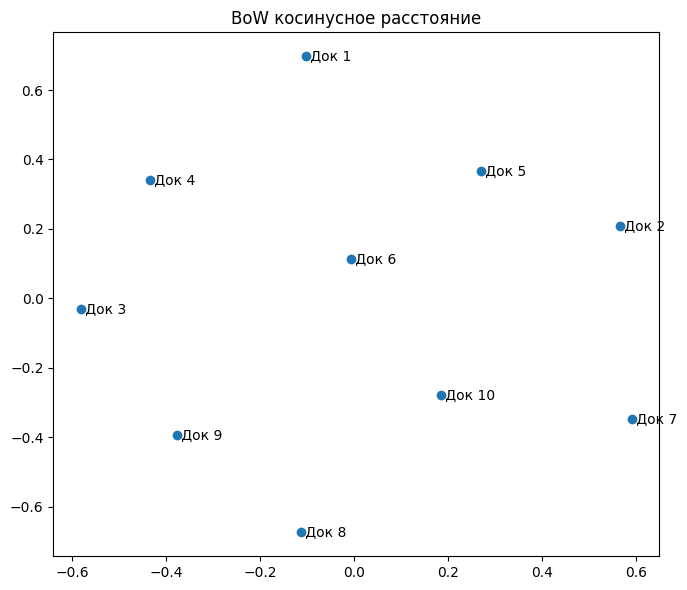

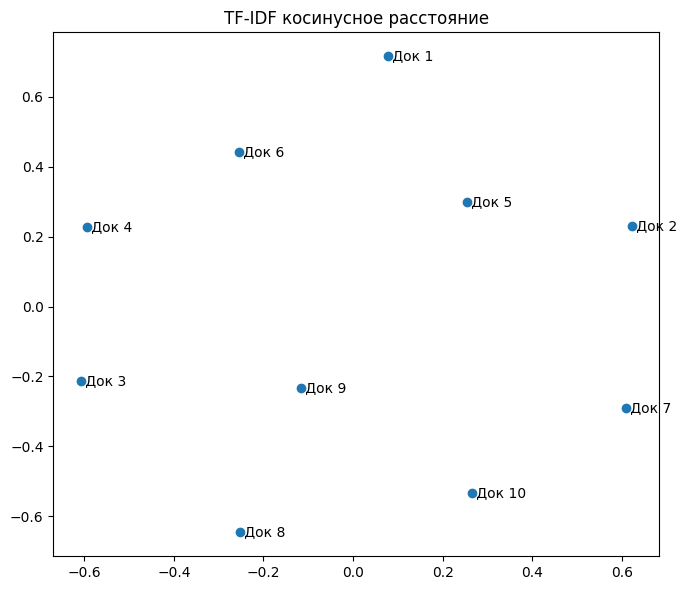

In [ ]:
docs_clean = [" ".join(preprocess_text(d)) for d in documents]
labels = [f"Док {i+1}" for i in range(len(docs_clean))]

bow = CountVectorizer()
X_bow = bow.fit_transform(docs_clean)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(docs_clean)
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances

def plot_mds(X, labels, title):
    D = cosine_distances(X)
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=42).fit_transform(D)

    plt.figure(figsize=(7,6))
    plt.scatter(coords[:,0], coords[:,1])
    for i, lab in enumerate(labels):
        plt.text(coords[i,0], coords[i,1], " " + lab, va="center")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_mds(X_bow, labels, "BoW косинусное расстояние")
plot_mds(X_tfidf, labels, "TF-IDF косинусное расстояние")



Разница в использовании двух методах есть, BoW часто поднимает самые частотные слова документа, TF-IDF лучше выделяет уникальную лексику, отодвигая более общие слова

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [ ]:
!pip install pymorphy3 -q

import pymorphy3
morph = pymorphy3.MorphAnalyzer(lang='ru')
from collections import Counter

text_ru = """Дональд Трамп вернулся в Белый дом и 20 января 2025 года стал 47-м президентом США. Трамп известен как самый скандальный американский лидер, но прославился он задолго до начала политической карьеры. Яркий миллиардер и плейбой появлялся в светской хронике, реалити-шоу и голливудских фильмах, строил небоскребы и казино, покупал шикарные отели и везде размещал свое имя. Он соблазнил Америку обещанием сделать ее великой и вернулся в Белый дом на второй срок вопреки судам, скандалам и захвату Капитолия. «Лента.ру» рассказывает биографию Дональда Трампе — о личной жизни, карьере, президентстве и о том, как он изменил свою страну. Дональд Джон Трамп родился 14 июня 1946 года в Нью-Йорке (США) в семье магната недвижимости Фреда Трампа и его жены Мэри Энн, которая эмигрировала из Шотландии в Америку в 17 лет. Бабушка со стороны отца, Элизабет Трамп, была очень предприимчивой женщиной с талантом к бизнесу. После ранней кончины мужа она вместе с 18-летним сыном создала строительную компанию Е. Trump & Son, которая спустя десятилетия стала многомиллионным бизнесом. В пять лет Дональд поступил в частную школу в Куинсе
. В 13 лет поступил в Нью-Йоркскую военную академию. Затем два года учился в Нью-Йоркском университете Фордхэм. Оттуда перевелся в Уортонскую школу бизнеса при Пенсильванском университете, которую окончил в 1968 году с экономической степенью и специализацией в финансах.
Во время войны во Вьетнаме Трамп получил несколько отсрочек как студент и одну — по медицинским показаниям, поэтому его на военную службу не призвали. Начало работы в строительном бизнесе. Еще в колледже Трамп начал каждое лето работать в компании отца E. Trump & Son, которая строила квартиры для среднего класса в Нью-Йорке. Закончив учебу, Дональд официально стал частью семейного бизнеса.
Отец выбрал Дональда преемником, потому что старший из сыновей, Фред, решил стать авиапилотом. Фред умер в 43 года из-за алкоголизма, поэтому Дональд всю жизнь избегал алкоголя и сигарет. Причем Трамп признавал, что еще до вступления в компанию получил от отца «небольшой» кредит — один миллион долларов на развитие бизнеса.
"""

text_en = """Donald Trump returned to the White House and became the 47th president of the United States on January 20, 2025. Trump is known as the most controversial American leader, but he rose to fame long before his political career began. The flamboyant billionaire and playboy appeared in society columns, reality shows, and Hollywood films, built skyscrapers and casinos, bought luxury hotels, and put his name on everything. He seduced America with the promise of making it great again and returned to the White House for a second term despite lawsuits, scandals, and the storming of the Capitol. Lenta.ru presents the biography of Donald Trump — his personal life, career, presidency, and how he changed his country. Donald John Trump was born on June 14, 1946, in New York City (USA) to real estate mogul Fred Trump and his wife Mary Anne, who emigrated from Scotland to America at the age of 17. His paternal grandmother, Elizabeth Trump, was a very enterprising woman with a talent for business. After the early death of her husband, she and her 18-year-old son founded the construction company E. Trump & Son, which decades later became a multimillion-dollar business. At the age of five, Donald enrolled in a private school in Queens
. At the age of 13, he enrolled in the New York Military Academy. He then studied for two years at Fordham University in New York. From there, he transferred to the Wharton School of Business at the University of Pennsylvania, graduating in 1968 with a degree in economics and a specialization in finance.
During the Vietnam War, Trump received several deferments as a student and one on medical grounds, so he was not drafted into military service. Start of work in the construction business. While still in college, Trump began working every summer at his father's company, E. Trump & Son, which built apartments for the middle class in New York. After graduating, Donald officially became part of the family business.
His father chose Donald as his successor because his eldest son, Fred, decided to become a pilot. Fred died at the age of 43 due to alcoholism, so Donald avoided alcohol and cigarettes throughout his life. Trump admitted that even before joining the company, he received a “small” loan from his father — one million dollars for business development.
"""


def tokenize_ru(text):

    words = re.findall(r'\b[\w-]+\b', text)
    return words

tokens_ru = tokenize_ru(text_ru)

analysis_results = []
pos_list = []

for word_text in tokens_ru:
    parsed_word = morph.parse(word_text)[0]

    pos = parsed_word.tag.POS if parsed_word.tag.POS else 'UNKN'
    pos_list.append(pos)


    case, gender, number, tense, person = None, None, None, None, None

    if pos == 'NOUN':
        case = parsed_word.tag.case
        gender = parsed_word.tag.gender
        number = parsed_word.tag.number
    elif pos == 'VERB' or pos == 'INFN':
        tense = parsed_word.tag.tense
        person = parsed_word.tag.person
        number = parsed_word.tag.number

    analysis_results.append({
        'Word': word_text,
        'POS': pos,
        'Case': case,
        'Gender': gender,
        'Number': number,
        'Tense': tense,
        'Person': person
    })


morph_df_ru = pd.DataFrame(analysis_results)
print("\n--- Морфологический анализ русского текста ---")
print(morph_df_ru)


pos_count = Counter(pos_list)
print("\n--- Частота частей речи (Русский) ---")
for pos, count in pos_count.most_common():
    print(f"{pos:10}: {count}")


def pluralize_nouns_ru(text):
    words = tokenize_ru(text)
    result_words = []
    for w in words:
        parsed = morph.parse(w.lower())[0] # Parse in lowercase for better matching with dictionary
        if 'NOUN' in parsed.tag:
            inflected = parsed.inflect({'plur'})
            if inflected:
                result_words.append(inflected.word)
            else:
                result_words.append(w)
        else:
            result_words.append(w)
    return ' '.join(result_words)

print("\n--- Преобразование существительных в множественное число ---")
print("Оригинальный текст: ", text_ru)
print("Текст с мн.ч. существительных: ", pluralize_nouns_ru(text_ru))

print("Russian morphological analysis and noun pluralization completed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 57.2 MB/s eta 0:00:00

--- Морфологический анализ русского текста ---
         Word   POS  Case Gender Number Tense Person
0     Дональд  NOUN  nomn   masc   sing  None   None
1       Трамп  NOUN  nomn   masc   sing  None   None
2    вернулся  VERB  None   None   sing  past   None
3           в  PREP  None   None   None  None   None
4       Белый  ADJF  None   None   None  None   None
..        ...   ...   ...    ...    ...   ...    ...
308   миллион  NOUN  accs   masc   sing  None   None
309  долларов  NOUN  gent   masc   plur  None   None
310        на  PREP  None   None   None  None   None
311  развитие  NOUN  accs   neut   sing  None   None
312   бизнеса  NOUN  gent   masc   sing  None   None

[313 rows x 7 columns]

--- Частота частей речи (Русский) ---
NOUN      : 132
PREP      : 46
ADJF      : 41
VERB      : 33
CONJ      : 19
UNKN      : 14
ADVB   

In [ ]:
doc_en = nlp_en(text_en)

analysis_results_en = []
pos_list_en = []

for token in doc_en:
    if token.is_punct or token.is_space:
        continue

    pos = token.pos_
    pos_list_en.append(pos)


    number, tense, person = None, None, None

    if pos == 'NOUN':
        if 'Sing' in token.tag_:
            number = 'SING'
        elif 'Plur' in token.tag_:
            number = 'PLUR'

    elif pos == 'VERB':

        tense = token.morph.get('Tense')
        person = token.morph.get('Person')

        number = token.morph.get('Number')


        tense = ', '.join(tense) if tense else None
        person = ', '.join(person) if person else None
        number = ', '.join(number) if number else None

    analysis_results_en.append({
        'Word': token.text,
        'POS': pos,
        'Number': number,
        'Tense': tense,
        'Person': person
    })

morph_df_en = pd.DataFrame(analysis_results_en)
print("--- Морфологический анализ английского текста ---")
print(morph_df_en.to_string())

pos_count_en = Counter(pos_list_en)
print("\n--- Частота частей речи (Английский) ---")
for pos, count in pos_count_en.most_common():
    print(f"{pos:10}: {count}")

def pluralize_nouns_en(text):
    doc = nlp_en(text)
    result_words = []
    for token in doc:
        if token.pos_ == 'NOUN' and 'Sing' in token.tag_:
            plural_form = token.lemma_ + 's'
            result_words.append(plural_form)
        else:
            result_words.append(token.text)
    return ' '.join(result_words)

print("\n--- Преобразование существительных в множественное число (Английский) ---")
print("Оригинальный текст: ", text_en[:200] + '...')
pluralized_text = pluralize_nouns_en(text_en)
print("Текст с мн.ч. существительных: ", pluralized_text[:200] + '...')


--- Морфологический анализ английского текста ---
               Word    POS Number Tense Person
0            Donald  PROPN   None  None   None
1             Trump  PROPN   None  None   None
2          returned   VERB   None  Past   None
3                to    ADP   None  None   None
4               the    DET   None  None   None
5             White  PROPN   None  None   None
6             House  PROPN   None  None   None
7               and  CCONJ   None  None   None
8            became   VERB   None  Past   None
9               the    DET   None  None   None
10             47th    ADJ   None  None   None
11        president   NOUN   None  None   None
12               of    ADP   None  None   None
13              the    DET   None  None   None
14           United  PROPN   None  None   None
15           States  PROPN   None  None   None
16               on    ADP   None  None   None
17          January  PROPN   None  None   None
18               20    NUM   None  None   None
19        

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [7]:
# ваш код

!python -m spacy download ru_core_news_md
!python -m spacy download en_core_web_md



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 109.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 31.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
russian_sentences = [
    "Она открыла бизнес.",
    "Восемь котят охотятся за щенком.",
    "Вот бы было ЕГЭ по физкультуре, но его не введут",
    "Когда Оптимус Прайм умрет, Фоллен снова восстанет.",
    "Дедлайн закончился еще вчера, а я до сих пор не отправил вторую лабу."
]
english_sentences = [
    "New phone looks good.",
    "I bought new clothes.",
    "They forgot that this milk is spoiled.",
    "If I were you I would take him home.",
    "Republicans won and these colorful people are still angry."
]


In [8]:
nlp_ru = spacy.load("ru_core_news_md")
nlp_en = spacy.load("en_core_web_md")
from spacy import displacy

In [9]:
print('Визуализация дерева зависимостей для русского языка\n')
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)

    print(f"Предложение {russian_sentences.index(sentence) + 1}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Визуализация дерева зависимостей для русского языка

Предложение 1


Предложение 2


Предложение 3


Предложение 4


Предложение 5


In [10]:
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    print(f"Sentence {english_sentences.index(sentence) + 1}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})


Sentence 1


Sentence 2


Sentence 3


Sentence 4


Sentence 5


In [11]:
def find_subj_pred_rus(doc):
    root = None
    pred_tokens = []

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    changed = True
    while changed:
        changed = False
        for t in doc:
            if t.dep_ == "conj" and t.head in pred_tokens and t.pos_ in {"VERB", "AUX"}:
                if t not in pred_tokens:
                    pred_tokens.append(t)
                    changed = True

    def pred_text(p):
        parts = {p}
        for ch in p.children:
            if ch.dep_ in {"aux", "auxpass", "cop", "neg"}:
                parts.add(ch)
            if ch.dep_ == "xcomp" and ch.pos_ in {"VERB", "AUX"}:
                parts.add(ch)
        return " ".join(tok.text for tok in sorted(parts, key=lambda x: x.i))

    def subjects(p):
        subs = [ch for ch in p.children if ch.dep_ in {"nsubj", "nsubjpass", "nsubj:pass"}]
        if subs:
            return subs
        if p.dep_ == "conj":
            return subjects(p.head)
        return []

    all_subj = []
    all_pred = []
    for p in sorted(pred_tokens, key=lambda x: x.i):
        all_pred.append(pred_text(p))
        all_subj.extend([s.text for s in subjects(p)])

    return all_subj, all_pred


In [12]:
for text in russian_sentences:
    doc = nlp_ru(text)
    subject, predicate = find_subj_pred_rus(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Предложение: Она открыла бизнес.
Подлежащее: ['Она'], Сказуемое: ['открыла']

Предложение: Восемь котят охотятся за щенком.
Подлежащее: ['котят'], Сказуемое: ['охотятся']

Предложение: Вот бы было ЕГЭ по физкультуре, но его не введут
Подлежащее: ['ЕГЭ', 'ЕГЭ'], Сказуемое: ['было', 'введут']

Предложение: Когда Оптимус Прайм умрет, Фоллен снова восстанет.
Подлежащее: ['Фоллен'], Сказуемое: ['восстанет']

Предложение: Дедлайн закончился еще вчера, а я до сих пор не отправил вторую лабу.
Подлежащее: ['Дедлайн', 'я'], Сказуемое: ['закончился', 'отправил']



In [13]:
def find_subj_pred_eng(doc):
    subj = []
    pred_tokens = []
    root = None
    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break
    if not root:
        return [], []

    for token in doc:
        if token.dep_ in ["aux", "auxpass"] and token.head in [root] + [t for t in pred_tokens]:
            pred_tokens.append(token)
    pred = [doc[i].text for i in sorted([t.i for t in pred_tokens])]
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            current = token
            while current.head != current:
                if current.head in pred_tokens or current.head == root:
                    subj.append(token.text)
                    break
                current = current.head
    if not subj:
        for token in doc:
            if token.dep_ in ["nsubj", "nsubj:pass"]:
                subj.append(token.text)
    return subj, pred

In [14]:
for text in english_sentences:
    doc = nlp_en(text)
    subject, predicate = find_subj_pred_eng(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Предложение: New phone looks good.
Подлежащее: ['phone'], Сказуемое: ['looks']

Предложение: I bought new clothes.
Подлежащее: ['I'], Сказуемое: ['bought']

Предложение: They forgot that this milk is spoiled.
Подлежащее: ['They', 'milk'], Сказуемое: ['forgot']

Предложение: If I were you I would take him home.
Подлежащее: ['I', 'I'], Сказуемое: ['would', 'take']

Предложение: Republicans won and these colorful people are still angry.
Подлежащее: ['Republicans', 'people'], Сказуемое: ['won']



In [15]:
print("Поиск прилагательное-существительное в русских предложениях:")
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)
    for token in doc_ru:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")

print("\nПоиск прилагательное-существительное в английских предложениях:")
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    for token in doc_en:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")

Поиск прилагательное-существительное в русских предложениях:
Найден объект: вторую — зависит от существительного: лабу

Поиск прилагательное-существительное в английских предложениях:
Найден объект: New — зависит от существительного: phone
Найден объект: new — зависит от существительного: clothes
Найден объект: colorful — зависит от существительного: people


In [16]:
def find_SVO(sentence, lang='en'):
    if lang == 'rus':
        doc = nlp_ru(sentence)
        for token in doc:
            if token.dep_ == "nsubj":
                subj = token.text
            if token.dep_ == "obj":
                obj = token.text
                predicate = token.head.text
                print(f"{subj} {predicate} {obj} ")
    else:
        doc = nlp_en(sentence)
        for token in doc:
            if token.dep_ in {"nsubj", "nsubjpass", "csubj", "csubjpass"}:
                subj = token.text
                predicate = token.head.text
            if token.dep_ in {"dobj", "iobj", "obj"}:
                obj = token.text
                print(f"{subj} {predicate} {obj}")

print("Примеры объектных и субъектных отношений из русских предложений:")
for sentence in russian_sentences:
    find_SVO(sentence, 'rus')
print("\nПримеры объектных и субъектных отношений из английских предложений:")
for sentence in english_sentences:
    find_SVO(sentence, 'en')

Примеры объектных и субъектных отношений из русских предложений:
Она открыла бизнес 
ЕГЭ введут его 
я отправил лабу 

Примеры объектных и субъектных отношений из английских предложений:
I bought clothes
I take him


Одна из трудностей заключалась в том, что в русском языке подлежащее может быть выражено разными частями речи. Кроме того, предложение может и не иметь подлежащего вовсе, но при этом составлять цельное предложение и оставаться самостоятельной частью сложного предложения. Создать правила и условия для каждого случая достаточно трудная и местами возможно невыполнимая задача для SpaCY. В английском языке тоже есть свои проблемы. Сложные предложения могут скрывать отношения между подлежащим и сказуемым. Без дополнительных функций или условий сложно правильно определить предлоги и артикли. Но в целом результат получился хорошим.

**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [67]:
# ваш код

news_text = "politics.txt"
with open(news_text, 'r', encoding='utf-8') as file:
    news_text = file.read()

In [68]:
def spacy_ner(text, language='english'):
    doc = nlp_en(news_text)
    # Извлечение сущностей
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

entities_spacy = spacy_ner(text)
for entity, entity_type in entities_spacy:
        print(f"- {entity}: {entity_type}")

- Trump: ORG
- British: NORP
- Nato: ORG
- Afghanistan: GPE
- US: GPE
- Fox News: ORG
- Nato: ORG
- US: GPE
- 457: CARDINAL
- British: NORP
- Afghanistan: GPE
- Trump: ORG
- Vietnam: GPE
- 3,486: CARDINAL
- Nato: ORG
- 20-year: DATE
- 2,461: CARDINAL
- US: GPE
- Canada: GPE
- 165: CARDINAL
- Denmark: GPE
- US: GPE
- Trump: ORG
- Greenland: GPE
- 44: CARDINAL
- Afghanistan: GPE
- US: GPE
- Fox News: ORG
- Trump: ORG
- Afghanistan: GPE
- ”Calvin Bailey: PERSON
- Labour MP: ORG
- RAF: ORG
- US: GPE
- Afghanistan: GPE
- Trump: ORG
- Conservative: NORP
- Ben Obese-Jecty: PERSON
- Afghanistan: GPE
- the Royal Yorkshire Regiment: ORG
- Nato: ORG
- the United States: GPE
- Tan Dhesi: PERSON
- US: GPE
- British: NORP
- Emily Thornberry: PERSON
- Vietnam: GPE
- Stephen Stewart: PERSON
- the Vietnam war: EVENT
- hundreds: CARDINAL
- British: NORP
- Afghanistan: GPE
- Liberal: ORG
- Democrat: NORP
- Ed Davey: PERSON
- 5: CARDINAL
- Farage: PERSON
- Bailey: ORG
- US: GPE
- 4 July in: DATE
- 2008: D

In [69]:
def improved_rule_based_ner(text, language='russian'):
    """
    Улучшенная реализация распознавания именованных сущностей на основе правил
    """
    # Начните с копирования и расширения базовой функции rule_based_ner
    entities = []

    # Токенизация текста
    if language == 'russian':
        words = word_tokenize(text, language='russian')
    else:
        words = word_tokenize(text, language='english')

    # 1. Новые шаблоны для дополнительных типов сущностей
    date_patterns = [
        r'\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{4}',
        r'\d{1,2}\s(?:января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря|янв|февр|мар|апр|авг|сент|окт|нояб|дек|)\s\d{4}',
        r'\d{1,2}/\d{1,2}/\d{4}',
        r'\d{1,2}\.\d{1,2}\.\d{4}'
    ]

    money_patterns = [
        r'$\d+(?:,\d+)*(?:\.\d+)?',
        r'\d+(?:,\d+)*(?:\.\d+)?\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)',
        r'\d+\s(?:млн|млрд|тыс\.)\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)'
    ]
    # Проценты
    percent_patterns = [
        r'\b\d{1,3}(?:[.,]\d+)?\s?%',
        r'\b\d{1,3}(?:[.,]\d+)?\s?(?:[-–—]\s?\d{1,3}(?:[.,]\d+)?)\s?%',
        r'(?i)\b\d{1,3}(?:[.,]\d+)?\s?(?:проц(?:ент(?:а|ов)?)?|pct|percent)\b',
    ]

    # Адреса электронной почты
    email_patterns = [
        r'(?i)\b[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}\b',
        r'(?i)\b[\w.!#$%&\'*+/=?^`{|}~-]+@[\w-]+(?:\.[\w-]+)+\b',
    ]

    # URL
    url_patterns = [
        r'(?i)\b(?:https?://|ftp://|www\.)[^\s<>"\']+',

        r'(?i)\b(?:[a-z0-9-]+\.)+[a-z]{2,}(?:/[^\s<>"\']*)?',
    ]


    # 2. Расширим словари
    person_prefixes = {'Mr.', 'Mrs.', 'Dr.', 'Prof.', 'Ms.', 'Sir', 'Lord', 'President', 'Duke', 'Duchess', 'Count', 'Countess', 'Senator', 'General', 'Marquis',
                       'Г-н', 'Г-жа', 'Доктор', 'Профессор', 'Господин', 'Госпожа',  'Лорд', 'Президент', 'Граф', 'Графиня', 'Герцог', 'Герцогиня', 'Сенатор', 'Маркиз', 'Генерал'}

    location_prefixes = {'in', 'at', 'from', 'around', 'infront', 'beside', 'behinde', 'to', 'в', 'из', 'на', 'через', 'между', 'по', 'под', 'над', 'за', 'во'}

    organizations = {'Apple', 'Google', 'Microsoft', 'IBM', 'Facebook', 'Twitter', 'NASA', 'FBI', 'CIA', 'Xiomi', 'ASUS', 'Nvidea', 'Lenovo', 'Sumsung', 'NASA', 'TESLA', 'X', 'New York Times',
                    'ООН', 'Газпром', 'Сбербанк', 'Яндекс', 'Роснефть', 'МГУ', 'РЖД', 'ФСБ', 'РИА Новости', 'Бурисма', 'Ozon', 'Wildberries', 'Озон', 'WB', 'ВБ', 'Рив Гош' }

    famous_people = {'Трамп', 'Дональд Трамп','Путин','Владимир Путин','Зеленский','Владимир Зеленский','Эммануэль Макрон','Кир Стармер',
                     'Trump', 'Donald Trump','Putin','Vladimir Putin','Zelensky','Vladimir Zelensky','Emmanuel Macron','Keir Starmer'}

    political_sides = {'Кремль', 'Белый Дом', 'Kremlin', 'White House'}

    # 3. Реализуем контекстное распознавание

    # Поиск дат
    for pattern in date_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'DATE'))

    # Поиск денежных сумм
    for pattern in money_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'MONEY'))

    # Поиск процентов
    for pattern in percent_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PERCENT'))

    # Поиск адреса электронной почты
    for pattern in email_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'EMAIL'))

    # Поиск URL
    for pattern in url_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'URL'))

    # Поиск людей, мест и организаций
    i = 0
    while i < len(words):
        # Поиск людей
        if i < len(words) - 1 and words[i] in person_prefixes:
            # Если слово после префикса начинается с заглавной буквы
            if words[i+1][0].isupper():
                # Собираем полное имя
                name_parts = []
                j = i + 1
                while j < len(words) and words[j][0].isupper() and words[j] not in string.punctuation:
                    name_parts.append(words[j])
                    j += 1
                if name_parts:
                    entities.append((' '.join([words[i]] + name_parts), 'PERSON'))
                    i = j
                    continue

        # Поиск организаций
        if words[i] in organizations:
            entities.append((words[i], 'ORGANIZATION'))

        # Поиск знаменитостей
        if words[i] in famous_people:
            entities.append((words[i], 'NOTABLE'))

        # Поиск политических сторон
        if words[i] in political_sides:
            entities.append((words[i], 'POLITICAL SIDES'))

        # Поиск мест
        if i < len(words) - 1 and words[i] in location_prefixes:
            if words[i+1][0].isupper():
                entities.append((words[i+1], 'LOCATION'))

        i += 1
    return entities

In [70]:
rule_entities = improved_rule_based_ner(news_text)

print("\nEnglish parallel text:")
for entity, entity_type in rule_entities:
    print(f"- {entity}: {entity_type}")


English parallel text:
- 40%: PERCENT
- 40%: PERCENT
- 60%: PERCENT
- 37%: PERCENT
- 8%: PERCENT
- 5%: PERCENT
- 9%: PERCENT
- 11%: PERCENT
- 6.2%: PERCENT
- 10.5%: PERCENT
- Trump: NOTABLE
- Afghanistan: LOCATION
- Afghanistan: LOCATION
- Trump: NOTABLE
- Vietnam.A: LOCATION
- Trump: NOTABLE
- Afghanistan: LOCATION
- Trump: NOTABLE
- Afghanistan: LOCATION
- Afghanistan: LOCATION
- Trump: NOTABLE
- Afghanistan: LOCATION
- Trump: NOTABLE
- Vietnam: LOCATION
- Trump: NOTABLE
- Afghanistan: LOCATION
- X: ORGANIZATION
- Trump: NOTABLE
- Trump: NOTABLE
- America: LOCATION
- Starmer: LOCATION
- Gorton: LOCATION
- Europe: LOCATION
- Burnham: LOCATION
- Greater: LOCATION
- No: LOCATION
- May: LOCATION
- Tony: LOCATION
- Ukraine: LOCATION
- South: LOCATION
- Mexico: LOCATION
- Trump: NOTABLE
- Mexico: LOCATION
- Japan: LOCATION
- Niigata: LOCATION
- Niigata: LOCATION
- September: LOCATION
- Tepco: LOCATION
- August: LOCATION
- November: LOCATION
- Trump: NOTABLE
- Trump: NOTABLE
- Trump: NOTAB

In [71]:
def evaluate_ner(predicted, gold_standard):
    # Преобразуем списки в множества для удобства сравнения
    predicted_set = set(predicted)
    gold_set = set(gold_standard)

    # Рассчитываем истинно положительные, ложно положительные и ложно отрицательные
    true_positives = len(predicted_set.intersection(gold_set))
    false_positives = len(predicted_set - gold_set)
    false_negatives = len(gold_set - predicted_set)

    # Рассчитываем точность, полноту и F1-меру
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [72]:
def print_evaluation_results(method_name, precision, recall, f1):
    print(f"\nРезультаты для {method_name}:")
    print('-' * 50)
    print(f"Точность (Precision): {precision:.4f}")
    print(f"Полнота (Recall): {recall:.4f}")
    print(f"F1-мера: {f1:.4f}")

In [73]:
gold_standard = [
("Barack Obama", "PERSON"),
("Angela Merkel", "PERSON"),
("June 2015", "DATE"),
("Apple", "ORGANISATION"),
("iPhone", "PRODUCT"),
("Cupertino", "LOCATION"),
("Harvard University", "ORGANISATION"),
("Nature", "ORGANISATION"),
("Volga River", "LOCATION"),
("Europe", "LOCATION"),
("World War II", "EVENT"),
("1945", "DATE"),
("Elon Musk", "PERSON"),
("Tesla", "ORGANISATION"),
("SpaceX", "ORGANISATION"),
("John", "PERSON"),
("Google", "ORGANISATION"),
("New York Stock Exchange", "ORGANISATION"),
("France", "LOCATION"),
("Germany", "LOCATION"),
("Paris", "LOCATION"),
("Everest", "LOCATION"),
("Himalayas", "LOCATION"),
("«War and Peace»", "WORK_OF_ART"),
("By Leo Tolstoy", "PERSON"),
("World Health Organization", "ORGANISATION"),
("COVID-19", "EVENT"),
("Friday", "DATE"),
("UAE", "LOCATION"),
]


In [74]:
# Оценка spaCy NER
spacy_precision, spacy_recall, spacy_f1 = evaluate_ner(entities_spacy, gold_standard)

print_evaluation_results("spaCy NER", spacy_precision, spacy_recall, spacy_f1)



Результаты для spaCy NER:
--------------------------------------------------
Точность (Precision): 0.0000
Полнота (Recall): 0.0000
F1-мера: 0.0000


In [75]:
# Оценка rule-based NER
rule_precision, rule_recall, rule_f1 = evaluate_ner(rule_entities, gold_standard)

print_evaluation_results("Rule-based", rule_precision, rule_recall, rule_f1)



Результаты для Rule-based:
--------------------------------------------------
Точность (Precision): 0.0263
Полнота (Recall): 0.0345
F1-мера: 0.0299


In [76]:
import pandas as pd

# Таблица сравнения
results_df = pd.DataFrame([
    {
        "Method": "spaCy NER",
        "Precision": spacy_precision,
        "Recall": spacy_recall,
        "F1": spacy_f1,
    },
    {
        "Method": "Rule-based",
        "Precision": rule_precision,
        "Recall": rule_recall,
        "F1": rule_f1,
    }
])


results_df[["Precision","Recall","F1"]] = results_df[["Precision","Recall","F1"]].round(4)
results_df

,Method,Precision,Recall,F1
0,spaCy NER,0.0000,0.0000,0.0000
1,Rule-based,0.0263,0.0345,0.0299
